In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

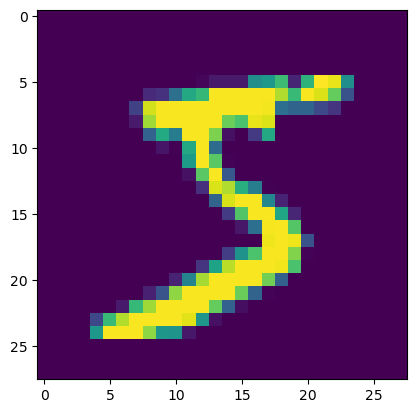

In [8]:
# plot first image in X_train
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Flatten:** Reshaping the (1, 28, 28) tensor into a 1D vector of length 28*28 = 784. This would be suitable for feeding the data into a fully connected (dense) layer in the neural network.

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2814 - accuracy: 0.9172 - val_loss: 0.1391 - val_accuracy: 0.9569
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1171 - accuracy: 0.9637 - val_loss: 0.1012 - val_accuracy: 0.9696
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0817 - accuracy: 0.9747 - val_loss: 0.1033 - val_accuracy: 0.9697
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.1058 - val_accuracy: 0.9708
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0931 - val_accuracy: 0.9743
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.1112 - val_accuracy:

In [18]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[2.8855018e-17, 1.0363569e-18, 2.2622090e-14, ..., 9.9999994e-01,
        1.4972198e-23, 2.3837246e-10],
       [3.8986147e-17, 3.0206144e-09, 9.9999994e-01, ..., 2.3692060e-18,
        2.7426833e-17, 2.6868785e-23],
       [4.1268651e-12, 9.9999994e-01, 4.5675841e-10, ..., 1.9055292e-08,
        8.4435996e-09, 3.1040522e-17],
       ...,
       [1.2868648e-22, 8.2408502e-16, 3.5469112e-26, ..., 5.7418339e-17,
        5.8276930e-18, 4.1177013e-14],
       [3.5919808e-26, 1.5702001e-21, 4.4906019e-31, ..., 3.8870754e-25,
        6.7300224e-14, 3.0905702e-25],
       [2.1877027e-15, 1.9959571e-23, 1.3118855e-22, ..., 1.3689042e-30,
        1.1085162e-17, 4.2474657e-24]], dtype=float32)

In [24]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9776

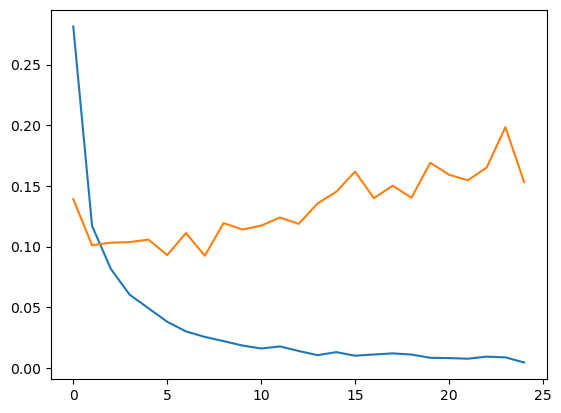

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

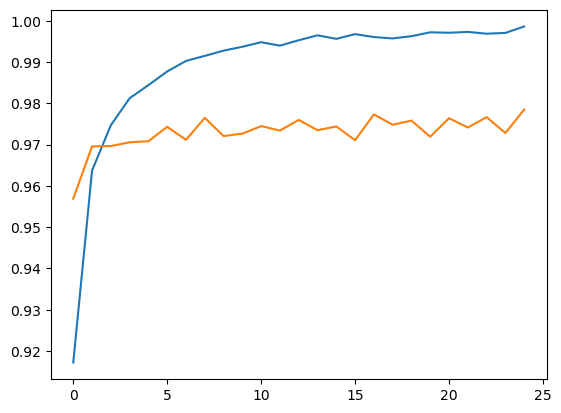

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

These plots is indicated overfitting

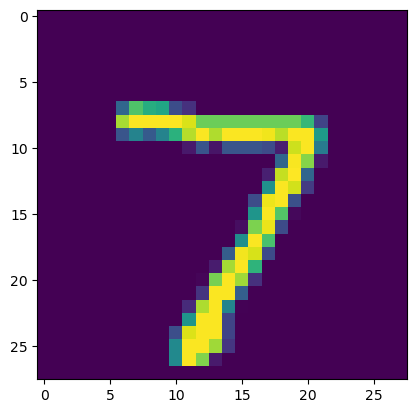

In [27]:
plt.imshow(X_test[0])

In [28]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([7])